In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import math

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Saving u.data to u (1).data


In [0]:
def NonNegativemat(user_A,f=100,lamW=0.001,lamH=0.001, steps = 60):
    #Step1
    m,n = user_A.shape
    ruihat = np.zeros((m,n))
    W=np.random.rand(m,f)
    H=np.random.rand(f,n)
    gateActivated = False

    #Step2
    wup=np.zeros([m,f])
    wdn=np.zeros([m,f])
    hup=np.zeros([f,n])
    hdn=np.zeros([f,n])
    #Step 3 : repeat
    for step in range(steps):
        #Step 4
        wup=np.zeros((m,f))
        wdn=np.zeros((m,f))
        hup=np.zeros((f,n))
        hdn=np.zeros((f,n))
        #Step 5
        if step > 0:
            print("step = ", step, " error = ", norm_ei)


        for u in range(0,m):
            for i in range(0,n):
                if user_A[u][i] > 0:
                    #Step6
                    ruihat[u][i] = np.dot(W[u,:],H[:, i])
                    #Step7
                    sum_ei = 0
                    #Step8
                    for v in range(m):
                        if user_A[v][i] > 0:
                            #Step 9
                            sum_ei += (user_A[v][i] - np.dot(W[v,:],H[:, i])) ** 2
                    #Step 10 ends for Step 8

                    #Step11
                    norm_ei = math.sqrt(sum_ei)
                    #Step 12:
                    for k in range (1, f):
                        
                        #Step 13,14,15,16
                        try:
                            wup[u][k] = float(wup[u][k] + H[k][i] * user_A[u][i]) / norm_ei
                            wdn[u][k] = float(wdn[u][k] + H[k][i] * ruihat[u][i])/ norm_ei
                            hup[k][i] = float(hup[k][i] + W[u][k] * user_A[u][i]) / norm_ei
                            hdn[k][i] = float(hdn[k][i] + W[u][k] * ruihat[u][i]) / norm_ei
                        except ZeroDivisionError:
                            print(ruihat)
                            return ruihat

                      
                    #if norm_ei ==0:
                        #print(norm_ei)
                    
                    #Step 17 end for Step 12

        #Step 18 end for step 5
        #Step 19
        for u in range(m):
            total_movies_rated =sum(ii > 0 for ii in user_A[u])
            if (total_movies_rated > 0):
                #Step 20
                for k in range (1, f):
                    #Step 21
                    try:
                        W[u][k] = float(W[u][k] * wup[u][k])/float(wdn[u][k] + total_movies_rated * lamW * W[u][k])
                    except ZeroDivisionError:
                        print(ruihat)
                        return ruihat,norm_ei

                #Step 22 End for Step 20
        #print(np.min(wdn),np.min(W))
        # Step 23 end for Step 19
 
        #Step 24:
        
        
        for i in range(n):
            total_users_rated =sum(ii > 0 for ii in user_A[:, i])
            if (total_users_rated > 0):
                #Step 25
                for k in range (1, f):
                    #Step 26
                    try:
                        H[k][i] =float (H[k][i] * hup[k][i])/float(hdn[k][i] + total_users_rated * lamH * H[k][i])
                    except ZeroDivisionError:
                        print(ruihat)
                        return ruihat,norm_ei
        for i in range(m):
            for j in range(n):
                ruihat[i][j] = np.dot(W[i,:],H[:,j])
        
            #Step 27 End for Step 25
        #print(np.min(hdn),np.min(H))
    # Step 28 end for Step 24
    #STep29 end for Step 3

    #Step 30
    
    return ruihat,norm_ei

In [0]:
#read data from file
ratings = pd.read_csv("./ml-100k/u.data",sep="\t",names = ["user_id", "item_id" , "ratings", "timestamp"])

tab_user = ratings.pivot_table(columns = ["item_id"] , index = ["user_id"], values = "ratings")#fill_value=0)
#centered cosine
#It finds mean of each row and substract elementwise
#read data from file
ratings = pd.read_csv("./ml-100k/u.data",sep="\t",names = ["user_id", "item_id" , "ratings", "timestamp"])


user_A = tab_user
user_A = user_A.fillna(0)
user_A = np.array(user_A)

In [13]:
latent = [10,20,40,60,80,100] 
valList = []
val = float('inf')
best_latent = 0
for i in latent:
  print(" Running with" , i , " latent features")
  matrix, RMSE = NonNegativemat(user_A,f=i,lamW=0.001,lamH=0.001, steps = 20)
  valList.append(RMSE)
  if RMSE < val:
    best_latent = i
    val = RMSE

    
  

 Running with 10  latent features
step =  1  error =  2.504442476530374
step =  2  error =  0.6932018933697269
step =  3  error =  0.36634796634483197
step =  4  error =  0.4352529526111337
step =  5  error =  0.29940807269361713
step =  6  error =  0.2826743343220534
step =  7  error =  0.2055529784464051
step =  8  error =  0.18408140389752994
step =  9  error =  0.1921870527344483
step =  10  error =  0.16095673822123335
step =  11  error =  0.2580782803168714
step =  12  error =  0.19779385041873812
step =  13  error =  0.3186640534116916
step =  14  error =  0.23082014568775996
step =  15  error =  0.3604244982205488
step =  16  error =  0.2635844184561233
step =  17  error =  0.39283631719201517
step =  18  error =  0.29289003107238604
step =  19  error =  0.4032620525069764
 Running with 20  latent features
step =  1  error =  6.568217084078033
step =  2  error =  1.9517383404859978
step =  3  error =  0.3792886083808964
step =  4  error =  0.4683126666013116
step =  5  error = 

In [14]:
print(best_latent, i)

10 100


In [15]:
print(RMSE)

0.49651471574796213


In [16]:
valList

[0.3064560056480299,
 0.4210698473019382,
 0.36226812127484914,
 0.3278730718238036,
 0.5334051665843998,
 0.49651471574796213]

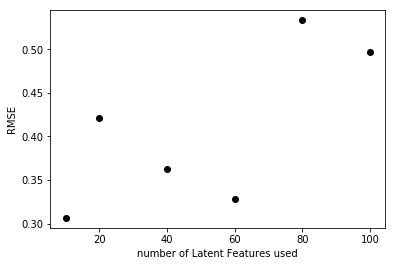

In [19]:
latent = [10,20,40,60,80,100] 
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(latent, valList, marker='o', c='black', linestyle = 'None')
plt.xlabel('number of Latent Features used')
plt.ylabel('RMSE')
plt.show()
